For this chapter, you will have to do the following:

• Import both Data Sets.


• Clean both Data Sets.

• Create a line plot with the number of neighbors of KNN on the
X-axis and the model’s accuracy on the Y-axis on the classification Data
Set.

• Create a line plot with the number of neighbors of KNN (Regression
version) on the X-axis and the MSE of the model on the Y-axis on the
regression Data Set.

• Create a heatmap using the TreeDecissionClassifier using the
max depth as X-axis, and max features as the Y-axis and the color of
the map should depend on the accuracy of the model on the classification
Data Set for the criterion = gini

• Create a heatmap using the TreeDecissionClassifier using the
max depth as X-axis, and max features as Y-axis, and the color of
the map should depend on the accuracy of the model on the classification
Data Set for the criterion = entropy.

• Create a heatmap using the TreeDecissionRegression using the
max depth as X-axis, and max features as Y-axis, and the color of
the map should depend on the MSE of the model on the regression Data
Set for the criterion = friedman mse.

• Create a heatmap using the TreeDecissionRegression using the
max depth as X-axis, and max features as Y-axis, and the color of
the map should depend on the MSE of the model on the regression Data
Set for the criterion = poisson.

• Create a line plot using the RandomForestClassifier containing 2
lines for criterion = gini and one for criterion = entropy on X-axis
should be the n estimators and one Y-axis the accuracy of the model
on the classification Data Set.

• Create a line plot using the RandomForestRegressor containing 3
lines for criterion = ”squared error”, criterion = ”absolute error”
and one for criterion = ”poisson”, on X-axis should be the
25
n estimators and one Y-axis the MSE of the model on the regression
Data Set.

• Create a line plot using the SVC model containing 3 lines for kernel= ’poly’, ’rbf ’, ’sigmoid’ on the X-axis should be the C and one
Y-axis the accuracy of the model on the classification Data Set.

• Create a line plot using the SVR model containing 3 lines for kernel= ’poly’, ’rbf ’, ’sigmoid’ on the X-axis should be the C and one
Y-axis the MSE of the model on the regression Data Set.

• Please extract a conclusion for every plot that you make.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df_cls = pd.read_csv('Dataset.csv')
df_reg = pd.read_csv('Dataset2.csv')

In [3]:
numeric_cols_cls = df_cls.select_dtypes(include='number').columns.tolist()
numeric_cols_reg = df_reg.select_dtypes(include='number').columns.tolist()
df_cls[numeric_cols_cls] = df_cls[numeric_cols_cls].replace([np.inf, -np.inf], np.nan)
df_reg[numeric_cols_reg] = df_reg[numeric_cols_reg].replace([np.inf, -np.inf], np.nan)

Mediana

In [4]:
imp_num = SimpleImputer(strategy='median')
df_cls[numeric_cols_cls] = imp_num.fit_transform(df_cls[numeric_cols_cls])
df_reg[numeric_cols_reg] = imp_num.fit_transform(df_reg[numeric_cols_reg])

In [5]:
cat_cols_cls = df_cls.select_dtypes(include='object').columns.tolist()
imp_cat = SimpleImputer(strategy='most_frequent')
df_cls[cat_cols_cls] = imp_cat.fit_transform(df_cls[cat_cols_cls])

In [6]:
#CHANGES
y_cls_binned = pd.qcut(df_cls['price'], q=3, labels=[0, 1, 2])
X_cls = df_cls.drop('price', axis=1)
y_cls = y_cls_binned

In [7]:
# Регрессионные данные
X_reg = df_reg.drop('ambient', axis=1)
y_reg = df_reg['ambient']

In [8]:
#признаки и таргеты
#X_cls = df_cls.drop('price', axis=1)
#y_cls = df_cls['price']
#X_reg = df_reg.drop('ambient', axis=1)
#y_reg = df_reg['ambient']


In [9]:
# Деление выборки
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [10]:
cat_cols = X_cls.select_dtypes(include='object').columns.tolist()
num_cols = X_cls.select_dtypes(include='number').columns.tolist()

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Обработка классификационного датасета
Xc_train = preprocessor.fit_transform(Xc_train)
Xc_test = preprocessor.transform(Xc_test)

# Обработка регрессионного датасета (все признаки числовые)
scaler_r = StandardScaler()
Xr_train = scaler_r.fit_transform(Xr_train)
Xr_test = scaler_r.transform(Xr_test)

KNN: классификация — график accuracy vs n_neighbors

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import time

#  Уменьштла размер выборки для ускорения
Xr_train_small = Xr_train[:1000]
yr_train_small = yr_train[:1000]
Xr_test_small = Xr_test[:200]
yr_test_small = yr_test[:200]

neighbors = list(range(1, 21))
mse_scores = []

for k in neighbors:
    start = time.time()
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(Xr_train_small, yr_train_small)
    preds = model.predict(Xr_test_small)
    mse = mean_squared_error(yr_test_small, preds)
    mse_scores.append(mse)
    print(f"k={k}, MSE={mse:.4f}, time={time.time() - start:.2f} sec")



k=1, MSE=1.7919, time=0.01 sec
k=2, MSE=1.5894, time=0.01 sec
k=3, MSE=1.4297, time=0.00 sec
k=4, MSE=1.4293, time=0.01 sec
k=5, MSE=1.4472, time=0.01 sec
k=6, MSE=1.5008, time=0.01 sec
k=7, MSE=1.4685, time=0.01 sec
k=8, MSE=1.4617, time=0.01 sec
k=9, MSE=1.4566, time=0.01 sec
k=10, MSE=1.5471, time=0.01 sec
k=11, MSE=1.5413, time=0.01 sec
k=12, MSE=1.5660, time=0.01 sec
k=13, MSE=1.5910, time=0.01 sec
k=14, MSE=1.6133, time=0.01 sec
k=15, MSE=1.6276, time=0.01 sec
k=16, MSE=1.6382, time=0.01 sec
k=17, MSE=1.6466, time=0.01 sec
k=18, MSE=1.6652, time=0.01 sec
k=19, MSE=1.6621, time=0.01 sec
k=20, MSE=1.6877, time=0.01 sec


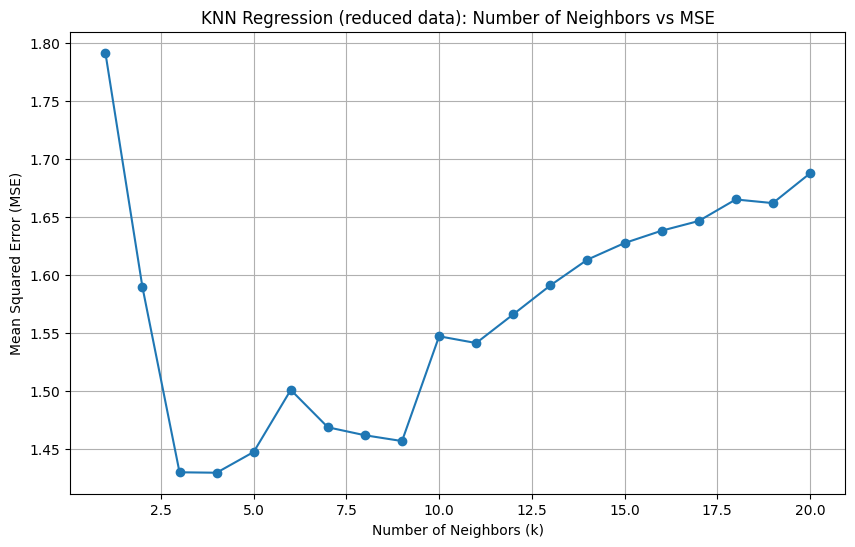

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(neighbors, mse_scores, marker='o', linestyle='-')
plt.title('KNN Regression (reduced data): Number of Neighbors vs MSE')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()



# **Деревья решений — классификация и регрессия, heatmap**

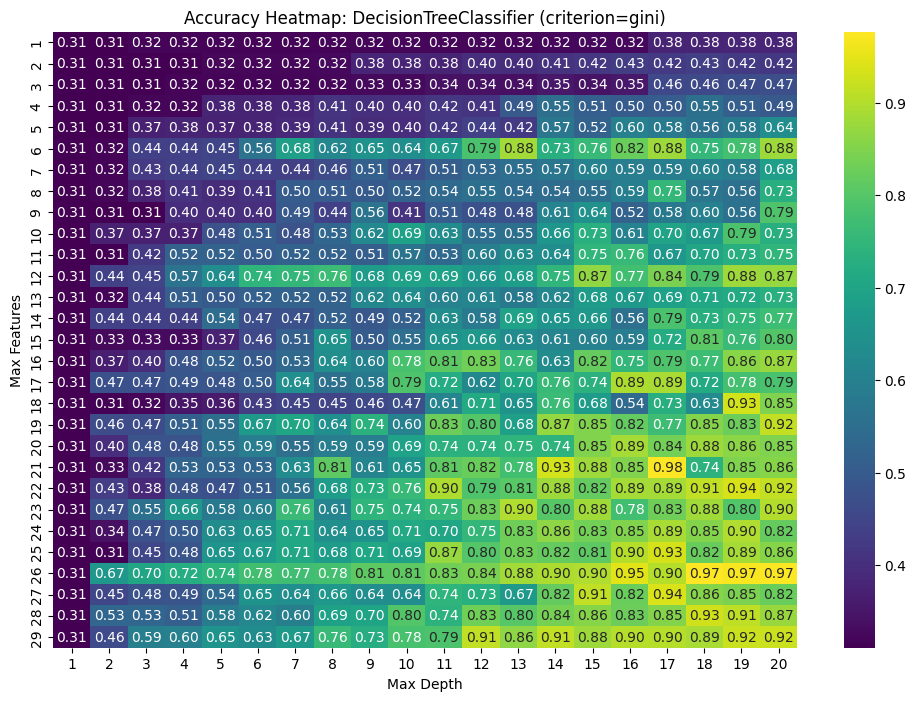

In [14]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

max_depth_values = range(1, 21)
max_features_values = range(1, min(30, Xc_train.shape[1] + 1))  # ограничим до 30 признаков

accuracy_matrix = np.zeros((len(max_features_values), len(max_depth_values)))

for i, max_feat in enumerate(max_features_values):
    for j, max_d in enumerate(max_depth_values):
        clf = DecisionTreeClassifier(criterion='gini', max_depth=max_d, max_features=max_feat, random_state=42)
        clf.fit(Xc_train, yc_train)
        preds = clf.predict(Xc_test)
        acc = accuracy_score(yc_test, preds)
        accuracy_matrix[i, j] = acc

plt.figure(figsize=(12, 8))
sns.heatmap(accuracy_matrix, annot=True, fmt=".2f", xticklabels=max_depth_values, yticklabels=max_features_values, cmap='viridis')
plt.title('Accuracy Heatmap: DecisionTreeClassifier (criterion=gini)')
plt.xlabel('Max Depth')
plt.ylabel('Max Features')
plt.show()

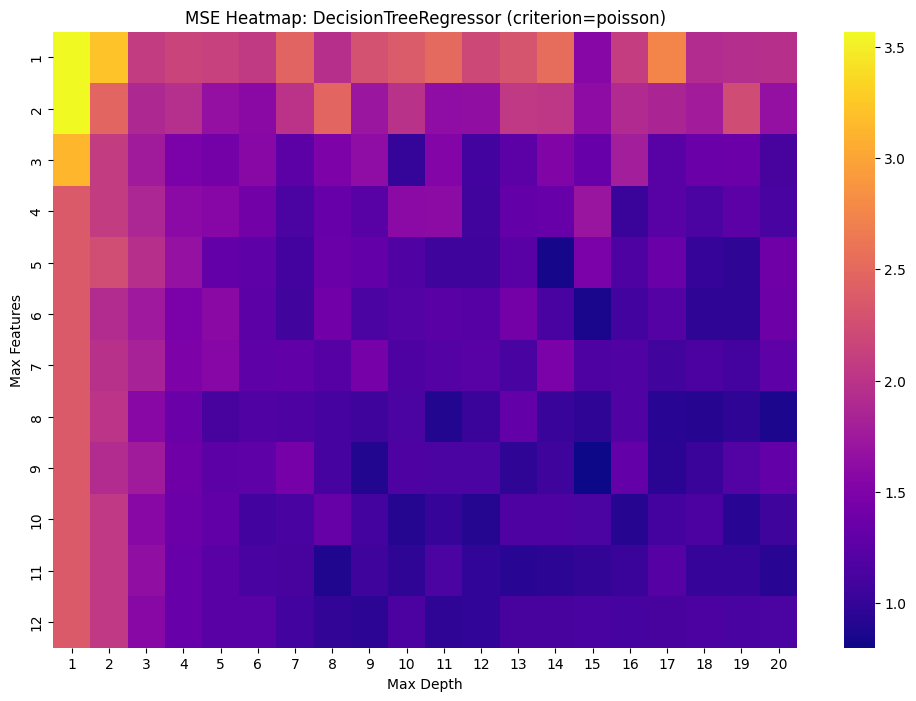

In [15]:
from sklearn.tree import DecisionTreeRegressor

# 🆕 Смещение y_reg, если есть отрицательные значения
if (y_reg < 0).any():
    shift = abs(y_reg.min()) + 1
    y_reg += shift
    print(f"⚠️ Добавлено смещение +{shift} к y_reg для использования Poisson.")

# 🆕 Обновление train/test с новым y_reg
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
Xr_train = scaler_r.fit_transform(Xr_train)
Xr_test = scaler_r.transform(Xr_test)

# 🆕 Уменьшенная выборка
Xr_train_small = Xr_train[:1000]
yr_train_small = yr_train[:1000]
Xr_test_small = Xr_test[:200]
yr_test_small = yr_test[:200]

# 🆕 Параметры и матрица для тепловой карты
max_depth_values = range(1, 21)
max_features_values = range(1, min(30, Xr_train.shape[1] + 1))

mse_matrix = np.zeros((len(max_features_values), len(max_depth_values)))

for i, max_feat in enumerate(max_features_values):
    for j, max_d in enumerate(max_depth_values):
        try:
            reg = DecisionTreeRegressor(
                criterion='poisson',
                max_depth=max_d,
                max_features=max_feat,
                random_state=42
            )
            reg.fit(Xr_train_small, yr_train_small)
            preds = reg.predict(Xr_test_small)
            mse = mean_squared_error(yr_test_small, preds)
            mse_matrix[i, j] = mse
        except ValueError:
            mse_matrix[i, j] = np.nan

#  Построение тепловой карты MSE
plt.figure(figsize=(12, 8))
sns.heatmap(mse_matrix, annot=False, xticklabels=max_depth_values, yticklabels=max_features_values, cmap='plasma')
plt.title('MSE Heatmap: DecisionTreeRegressor (criterion=poisson)')
plt.xlabel('Max Depth')
plt.ylabel('Max Features')
plt.show()


# ***RandomForestClassifier — accuracy vs n_estimators***

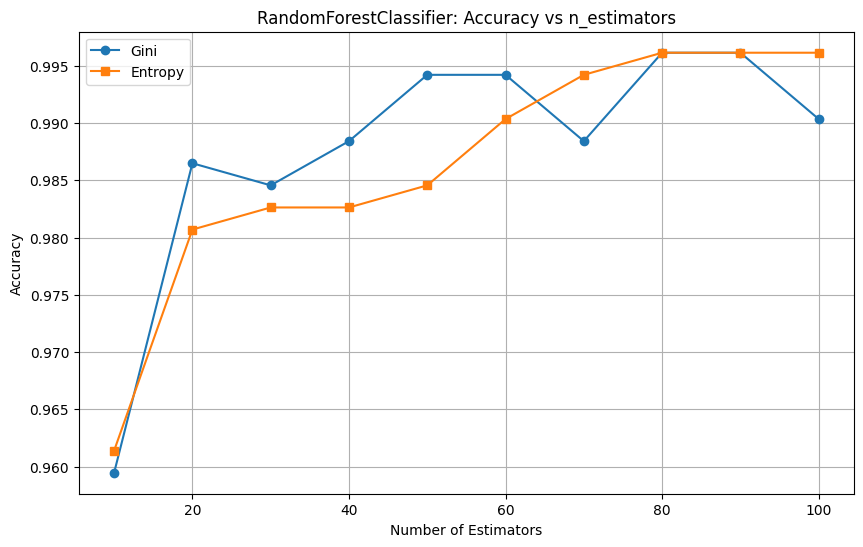

In [16]:
from sklearn.ensemble import RandomForestClassifier

estimators_range = range(10, 110, 10)
acc_gini = []
acc_entropy = []

for n in estimators_range:
    # Gini
    clf_gini = RandomForestClassifier(n_estimators=n, criterion='gini', random_state=42)
    clf_gini.fit(Xc_train, yc_train)
    preds_gini = clf_gini.predict(Xc_test)
    acc_gini.append(accuracy_score(yc_test, preds_gini))

    # Entropy
    clf_entropy = RandomForestClassifier(n_estimators=n, criterion='entropy', random_state=42)
    clf_entropy.fit(Xc_train, yc_train)
    preds_entropy = clf_entropy.predict(Xc_test)
    acc_entropy.append(accuracy_score(yc_test, preds_entropy))

# График
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, acc_gini, marker='o', label='Gini')
plt.plot(estimators_range, acc_entropy, marker='s', label='Entropy')
plt.title('RandomForestClassifier: Accuracy vs n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# ***RandomForestRegressor — MSE vs n_estimators***

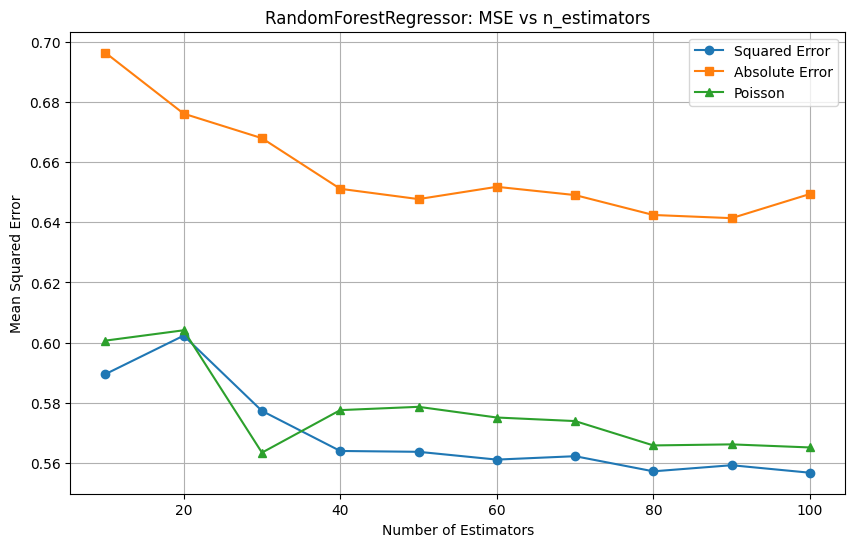

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Маленькую выборка
Xr_train_small = Xr_train[:1000]
yr_train_small = yr_train[:1000]
Xr_test_small = Xr_test[:200]
yr_test_small = yr_test[:200]

estimators_range = range(10, 110, 10)
mse_sq = []
mse_abs = []
mse_pois = []

for n in estimators_range:
    # Squared error
    rf_sq = RandomForestRegressor(n_estimators=n, criterion='squared_error', random_state=42)
    rf_sq.fit(Xr_train_small, yr_train_small)
    pred_sq = rf_sq.predict(Xr_test_small)
    mse_sq.append(mean_squared_error(yr_test_small, pred_sq))

    # Absolute error
    rf_abs = RandomForestRegressor(n_estimators=n, criterion='absolute_error', random_state=42)
    rf_abs.fit(Xr_train_small, yr_train_small)
    pred_abs = rf_abs.predict(Xr_test_small)
    mse_abs.append(mean_squared_error(yr_test_small, pred_abs))

    # Poisson (если все значения положительные)
    try:
        rf_pois = RandomForestRegressor(n_estimators=n, criterion='poisson', random_state=42)
        rf_pois.fit(Xr_train_small, yr_train_small)
        pred_pois = rf_pois.predict(Xr_test_small)
        mse_pois.append(mean_squared_error(yr_test_small, pred_pois))
    except ValueError:
        mse_pois.append(np.nan)

# график
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, mse_sq, marker='o', label='Squared Error')
plt.plot(estimators_range, mse_abs, marker='s', label='Absolute Error')
plt.plot(estimators_range, mse_pois, marker='^', label='Poisson')
plt.title('RandomForestRegressor: MSE vs n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


# ***SVC***

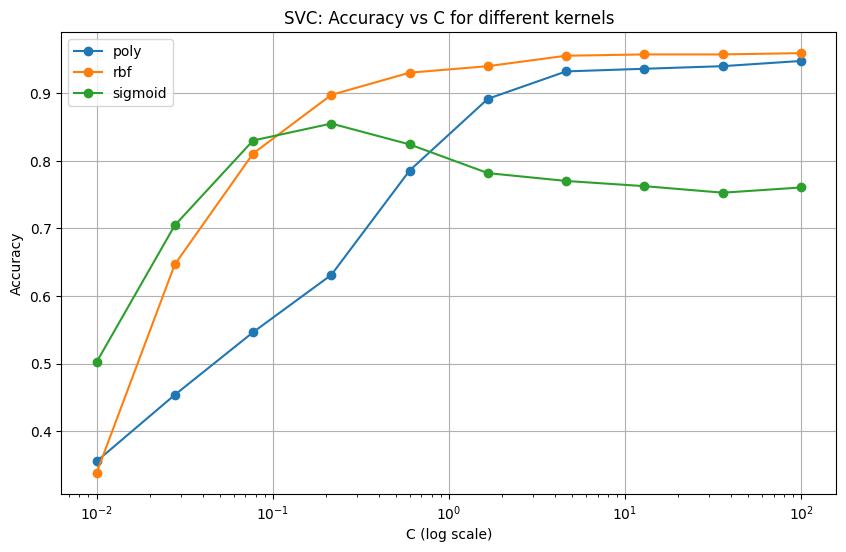

In [18]:
from sklearn.svm import SVC

C_values = np.logspace(-2, 2, 10)  # от 0.01 до 100 логарифмически
kernels = ['poly', 'rbf', 'sigmoid']
results_svc = {k: [] for k in kernels}

for kernel in kernels:
    for C in C_values:
        clf = SVC(kernel=kernel, C=C)
        clf.fit(Xc_train, yc_train)
        acc = accuracy_score(yc_test, clf.predict(Xc_test))
        results_svc[kernel].append(acc)


plt.figure(figsize=(10, 6))
for kernel in kernels:
    plt.plot(C_values, results_svc[kernel], marker='o', label=kernel)
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('SVC: Accuracy vs C for different kernels')
plt.legend()
plt.grid(True)
plt.show()


# ***SVR***

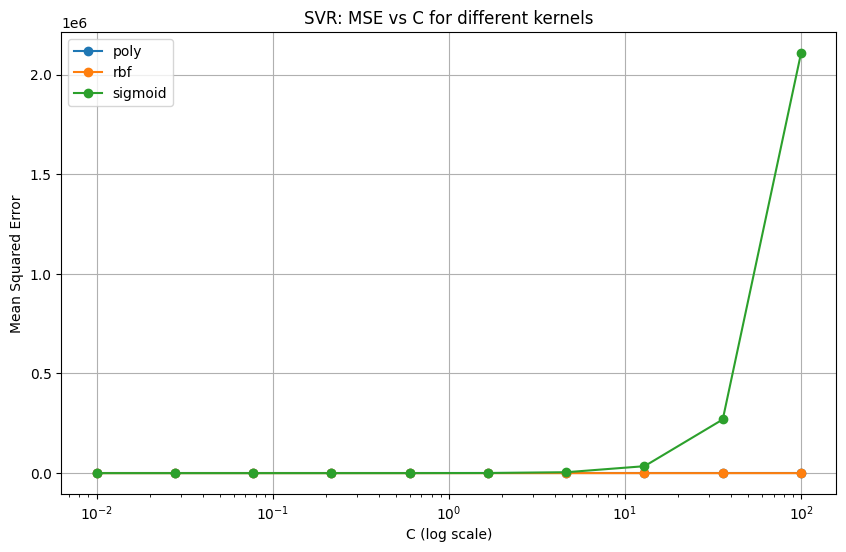

In [19]:
from sklearn.svm import SVR

# выборка
Xr_train_small = Xr_train[:1000]
yr_train_small = yr_train[:1000]
Xr_test_small = Xr_test[:200]
yr_test_small = yr_test[:200]

results_svr = {k: [] for k in kernels}

for kernel in kernels:
    for C in C_values:
        svr = SVR(kernel=kernel, C=C)
        svr.fit(Xr_train_small, yr_train_small)
        pred = svr.predict(Xr_test_small)
        mse = mean_squared_error(yr_test_small, pred)
        results_svr[kernel].append(mse)


plt.figure(figsize=(10, 6))
for kernel in kernels:
    plt.plot(C_values, results_svr[kernel], marker='o', label=kernel)
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('SVR: MSE vs C for different kernels')
plt.legend()
plt.grid(True)
plt.show()
